# Projeto1: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Vamos importar as bibliotecas de visualização e configurar% matplotlib inline. **
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Vamos ler o arquivo 911.csv localizado no HD Externo como um dataframe chamado df
df = pd.read_csv('/media/felipe/SAMSUNG/LAPTOP RECENTE/felipe/Python3.7/udemyCOURSES/PythonParaDataScienceEMachineLearning/Python-Data-Science-and-Machine-Learning-Bootcamp/4. Projetos de dados/911.csv')

In [4]:
df.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Perguntas básicas
### Vamos agora extrair importantes informações do dataframe df

In [6]:
# Vamos ver quais foram os top 5 CEPs que mais chamaram o 911?
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
# Quais foram os 10 municípios que mais chamaram o 911?
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

####  Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem? 

In [8]:
df['title']

0                EMS: BACK PAINS/INJURY
1               EMS: DIABETIC EMERGENCY
2                   Fire: GAS-ODOR/LEAK
3                EMS: CARDIAC EMERGENCY
4                        EMS: DIZZINESS
5                      EMS: HEAD INJURY
6                  EMS: NAUSEA/VOMITING
7            EMS: RESPIRATORY EMERGENCY
8                 EMS: SYNCOPAL EPISODE
9           Traffic: VEHICLE ACCIDENT -
10          Traffic: VEHICLE ACCIDENT -
11          Traffic: VEHICLE ACCIDENT -
12          Traffic: VEHICLE ACCIDENT -
13          Traffic: VEHICLE ACCIDENT -
14          Traffic: VEHICLE ACCIDENT -
15          Traffic: VEHICLE ACCIDENT -
16           EMS: RESPIRATORY EMERGENCY
17                       EMS: DIZZINESS
18                EMS: VEHICLE ACCIDENT
19          Traffic: DISABLED VEHICLE -
20          Traffic: VEHICLE ACCIDENT -
21          Traffic: DISABLED VEHICLE -
22                 Fire: APPLIANCE FIRE
23          Traffic: DISABLED VEHICLE -
24          Traffic: VEHICLE ACCIDENT -


In [9]:
len(df['title'].unique())

110

## Criando novos recursos

### Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

### Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **



In [10]:
# Notando que todos os elementos da coluna title aparecem com um ':' separando o tipo do subtipo do caso
# Vejamos como separar estas partes usando o caractere ":"
df['title'].iloc[0]

'EMS: BACK PAINS/INJURY'

In [11]:
df['title'].iloc[0].split(':')

['EMS', ' BACK PAINS/INJURY']

In [12]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [13]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [16]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
5            EMS
6            EMS
7            EMS
8            EMS
9        Traffic
10       Traffic
11       Traffic
12       Traffic
13       Traffic
14       Traffic
15       Traffic
16           EMS
17           EMS
18           EMS
19       Traffic
20       Traffic
21       Traffic
22          Fire
23       Traffic
24       Traffic
25           EMS
26           EMS
27          Fire
28       Traffic
29       Traffic
          ...   
99462        EMS
99463        EMS
99464        EMS
99465        EMS
99466        EMS
99467        EMS
99468       Fire
99469       Fire
99470        EMS
99471        EMS
99472        EMS
99473        EMS
99474        EMS
99475    Traffic
99476        EMS
99477        EMS
99478    Traffic
99479        EMS
99480        EMS
99481        EMS
99482    Traffic
99483        EMS
99484       Fire
99485    Traffic
99486    Traffic
99487    Traffic
99488    Traffic
99489        E

In [14]:
df.head(8)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS


##### Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? 

In [15]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [16]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

#### Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. 

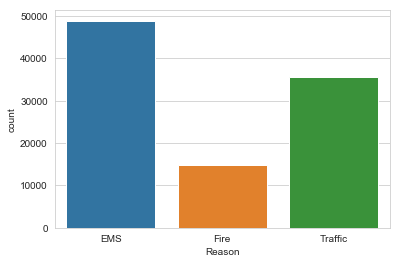

In [17]:
sns.countplot(x='Reason', data=df)

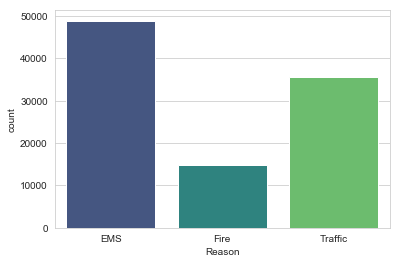

In [18]:
sns.countplot(x='Reason', data=df, palette='viridis')

#### Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?

In [19]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [20]:
type(df['timeStamp'].iloc[0])

str

#### Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. 

In [21]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [23]:
# Vejamos agora o tipo
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:

    time = df['timeStamp'].iloc[0]
    time.hour

#### Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. 

In [24]:
# Vamos escolher o quinto elemento para teste
df['timeStamp'].iloc[4]

Timestamp('2015-12-10 17:40:01')

In [25]:
time4 = df['timeStamp'].iloc[4]

##### Vejamos como extrair informações temporais desse TimeStamp element

In [26]:
# Year
time4.year

2015

In [27]:
# Month
time4.month

12

In [28]:
# Day
time4.day

10

In [29]:
# Hour
time4.hour

17

In [30]:
time4.dayofweek

3

In [31]:
# Para criar novas colunas com uma certa propriedade a partir de uma velha coluna devemos usar o método .apply 
# e colocar uma função lambda que especifique a propriedade dessa nova coluna.
# Coluna Hour
df['Hour'] = df['timeStamp'].apply(lambda timeStamp : timeStamp.hour)

In [32]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17


In [33]:
# Coluna Month
df['Month'] = df['timeStamp'].apply(lambda timeStamp : timeStamp.month)

In [34]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8])

###### Notamos acima que no dataframe df não aparecem datas nos meses de Setembro, Outubro e Novembro

In [35]:
# Coluna Day of Week
df['Day of Week'] = df['timeStamp'].apply(lambda timeStamp : timeStamp.dayofweek)

In [36]:
df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [37]:
df.head(16)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,3
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,3
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,3
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,3


##### Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: 

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [38]:
 dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [39]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [40]:
# Vamos redefinir a coluna 'Day of Week' com essa nova propriedade
df['Day of Week'] = df['Day of Week'].map(dmap)

In [41]:
df['Day of Week'].head(16)

0     Thu
1     Thu
2     Thu
3     Thu
4     Thu
5     Thu
6     Thu
7     Thu
8     Thu
9     Thu
10    Thu
11    Thu
12    Thu
13    Thu
14    Thu
15    Thu
Name: Day of Week, dtype: object

In [42]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,Thu
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,Thu
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,Thu
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu


#### Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. 

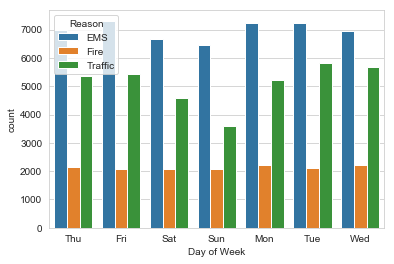

In [48]:
sns.countplot(x='Day of Week', data=df, hue='Reason')

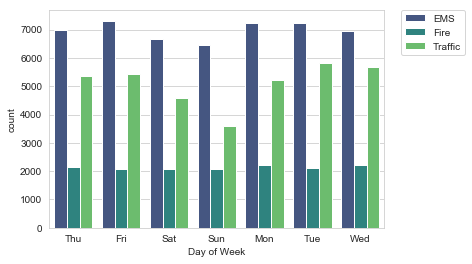

In [43]:
# Para deixar mais bonitoi
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Agora vamos fazer o mesmo com o mês

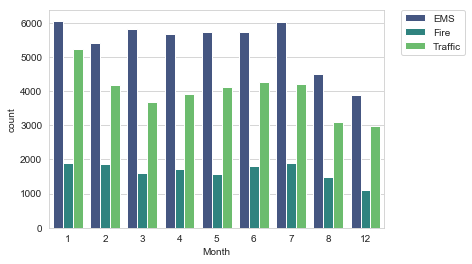

In [44]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Podemos notar que estão faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preenche os meses que faltam. Para fazer isso, precisamos trabalhar com pandas.


### Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado.

In [45]:
df.count()

lat            99492
lng            99492
desc           99492
zip            86637
title          99492
timeStamp      99492
twp            99449
addr           98973
e              99492
Reason         99492
Hour           99492
Month          99492
Day of Week    99492
dtype: int64

In [51]:
# Vamos criar uma tabela em que a coluna CEP vira um índice, o que será útil para analisar mais a fundo 
# informações sobre endereços
df.groupby('zip').count().head(10)

,lat,lng,desc,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
zip,,,,,,,,,,,,
17752.0,1,1,1,1,1,0,1,1,1,1,1,1
18036.0,2,2,2,2,2,2,2,2,2,2,2,2
18041.0,414,414,414,414,414,414,414,414,414,414,414,414
18054.0,326,326,326,326,326,326,325,326,326,326,326,326
18056.0,6,6,6,6,6,6,6,6,6,6,6,6
18070.0,54,54,54,54,54,54,54,54,54,54,54,54
18073.0,736,736,736,736,736,736,736,736,736,736,736,736
18074.0,435,435,435,435,435,435,435,435,435,435,435,435
18076.0,306,306,306,306,306,306,306,306,306,306,306,306


In [52]:
# Vamos agora criar uma tabela em que a coluna mês vira um índice
df.groupby('Month').count().head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


##### Notemos que a tabela acima mostra em cada coluna o quanto de vezes que um dado elemento daquela dada coluna ocorreu no referido mês

### Com isso agora podemos criar um plot simples fora do Dataframe indicando a contagem de chamadas por mês. 

In [53]:
byMonth = df.groupby('Month').count()

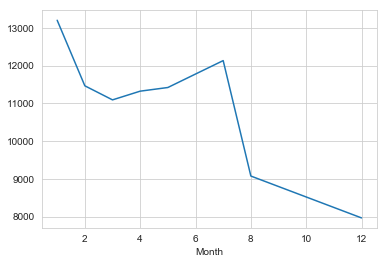

In [54]:
byMonth['twp'].plot()

#### Agora vamos usar o lmplot() do Seaborn para criar um modelo linear no número de chamadas por mês. Tenhamos em mente que talvez seja necessário resetar o índice em uma coluna. **

In [55]:
df.groupby('Month').count().head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [56]:
# Para podermos usar o mês como coordenada x do lmplot devemos primeiro resetar o índice 
# fazendo o Month deixar de ser um índice e passar a ser uma coluna
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


/home/felipe/Python/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


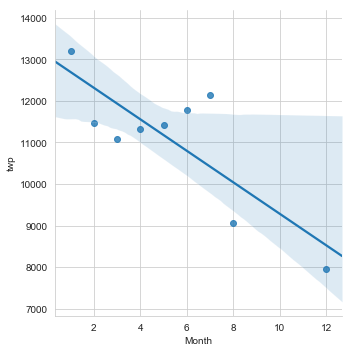

In [57]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

#### Vamos criar uma nova coluna chamada 'Date' que contenha a data da coluna timeStamp. Pra isso vamos precisar usar o método .apply() junto com o método .date(). 

In [60]:
df['timeStamp'].iloc[3]

Timestamp('2015-12-10 17:40:01')

In [61]:
df['timeStamp'].iloc[3].hour

17

In [62]:
df['timeStamp'].iloc[3].time()

datetime.time(17, 40, 1)

In [63]:
df['timeStamp'].iloc[3].date()

datetime.date(2015, 12, 10)

In [64]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [65]:
df['Date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

In [66]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [67]:
# Agora vamos agrupar esta coluna Date com o groupby. Usando o count (), criaremos
# um gráfico de contagens de chamadas 911.
df.groupby('Date').count().head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
2015-12-15,421,421,421,380,421,421,420,419,421,421,421,421,421
2015-12-16,377,377,377,343,377,377,377,376,377,377,377,377,377
2015-12-17,388,388,388,336,388,388,388,387,388,388,388,388,388
2015-12-18,346,346,346,306,346,346,346,346,346,346,346,346,346


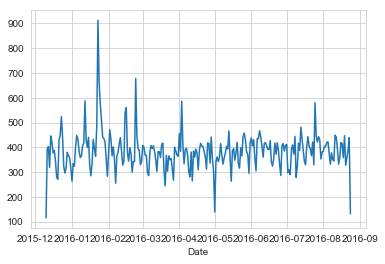

In [69]:
df.groupby('Date').count()['twp'].plot()

#### * Agora vamos recriar esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 

In [72]:
df[df['Reason']=='Traffic'].head(6)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,Thu,2015-12-10
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1,Traffic,17,12,Thu,2015-12-10
11,40.084161,-75.308386,BROOK RD & COLWELL LN; PLYMOUTH; 2015-12-10 @ ...,19428.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,PLYMOUTH,BROOK RD & COLWELL LN,1,Traffic,17,12,Thu,2015-12-10
12,40.174131,-75.098491,BYBERRY AVE & S WARMINSTER RD; UPPER MORELAND;...,19040.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MORELAND,BYBERRY AVE & S WARMINSTER RD,1,Traffic,17,12,Thu,2015-12-10
13,40.062974,-75.135914,OLD YORK RD & VALLEY RD; CHELTENHAM; 2015-12-1...,19027.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,CHELTENHAM,OLD YORK RD & VALLEY RD,1,Traffic,17,12,Thu,2015-12-10
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1,Traffic,17,12,Thu,2015-12-10


Text(0.5, 1.0, 'Traffic')

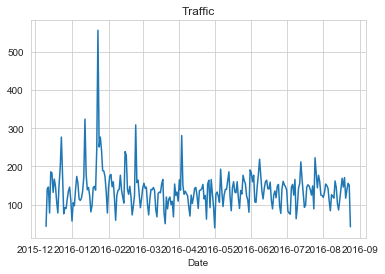

In [93]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

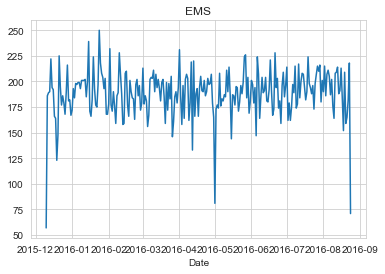

In [74]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

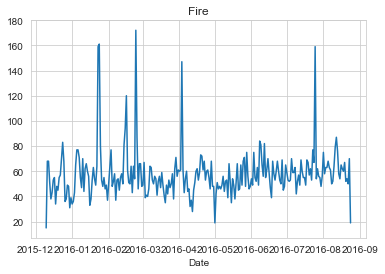

In [75]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')

#### Vamos agora plotar um heatplot mostrando o número de chamadas 911 por dia da semana e por hora

In [78]:
# Com a opção "by" do método groupby podemos criar mais de um índice para tratar dos dados em relação a
dayHour = df.groupby(by=['Day of Week','Hour']).count()
dayHour

lat   lng  desc  zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                              
Fri         0      275   275   275  248    275        275   275   275   275   
            1      235   235   235  200    235        235   235   232   235   
            2      191   191   191  165    191        191   191   191   191   
            3      175   175   175  164    175        175   175   175   175   
            4      201   201   201  184    201        201   201   201   201   
            5      194   194   194  166    194        194   194   194   194   
            6      372   372   372  319    372        372   372   369   372   
            7      598   598   598  526    598        598   598   593   598   
            8      742   742   742  637    742        742   742   737   742   
            9      752   752   752  663    752        752   752   748   752   
            10     803   803   803  722    803        803   803   800   803   
            11     859   859   859  756    859        859   859   858   859   
            12     885   885   885  764    885        885   885   877   885   
            13     890   890   890  767    890        890   890   885   890   
            14     932   932   932  808    932        932   931   926   932   
            15     980   980   980  840    980        980   980   976   980   
            16    1039  1039  1039  897   1039       1039  1039  1038  1039   
            17     980   980   980  826    980        980   980   971   980   
            18     820   820   820  714    820        820   819   818   820   
            19     696   696   696  616    696        696   696   693   696   
            20     667   667   667  569    667        667   667   666   667   
            21     559   559   559  491    559        559   558   553   559   
            22     514   514   514  445    514        514   514   513   514   
            23     474   474   474  400    474        474   474   469   474   
Mon         0      282   282   282  243    282        282   282   282   282   
            1      221   221   221  198    221        221   220   221   221   
            2      201   201   201  183    201        201   201   201   201   
            3      194   194   194  173    194        194   194   194   194   
            4      204   204   204  185    204        204   204   203   204   
            5      267   267   267  222    267        267   267   267   267   
...                ...   ...   ...  ...    ...        ...   ...   ...   ...   
Tue         18     905   905   905  761    905        905   905   900   905   
            19     731   731   731  666    731        731   731   722   731   
            20     647   647   647  579    647        647   647   646   647   
            21     571   571   571  494    571        571   570   565   571   
            22     462   462   462  411    462        462   462   460   462   
            23     274   274   274  245    274        274   274   273   274   
Wed         0      250   250   250  226    250        250   249   249   250   
            1      216   216   216  193    216        216   216   216   216   
            2      189   189   189  169    189        189   189   188   189   
            3      209   209   209  195    209        209   207   209   209   
            4      156   156   156  138    156        156   156   155   156   
            5      255   255   255  224    255        255   254   254   255   
            6      410   410   410  334    410        410   409   409   410   
            7      701   701   701  591    701        701   701   692   701   
            8      875   875   875  770    875        875   875   872   875   
            9      808   808   808  714    808        808   808   805   808   
            10     800   800   800  713    800        800   800   799   800   
            11     789   789   789  698    789        789   789   784

In [79]:
#### Podemos selecionar uma coluna para plotar depois
dayHour = df.groupby(by=['Day of Week','Hour']).count()['twp']
dayHour

Day of Week  Hour
Fri          0        275
             1        235
             2        191
             3        175
             4        201
             5        194
             6        372
             7        598
             8        742
             9        752
             10       803
             11       859
             12       885
             13       890
             14       931
             15       980
             16      1039
             17       980
             18       819
             19       696
             20       667
             21       558
             22       514
             23       474
Mon          0        282
             1        220
             2        201
             3        194
             4        204
             5        267
                     ... 
Tue          18       905
             19       731
             20       647
             21       570
             22       462
             23       274
Wed          0      

In [101]:
# Se usarmos o método unstack podemos organizar esse dataframe numa matriz com 2 índices
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


#### Com isso agora podemos criar um heatplot com 2 variáveis onde cada uma se associa a um dos índices da matriz acima

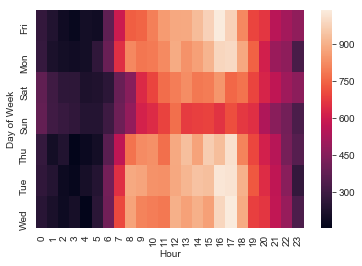

In [102]:
sns.heatmap(dayHour)

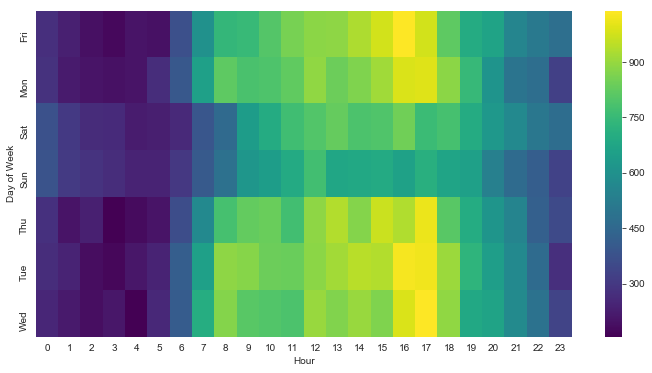

In [103]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

####  Agora vamos criar um clustermap usando este DataFrame. 

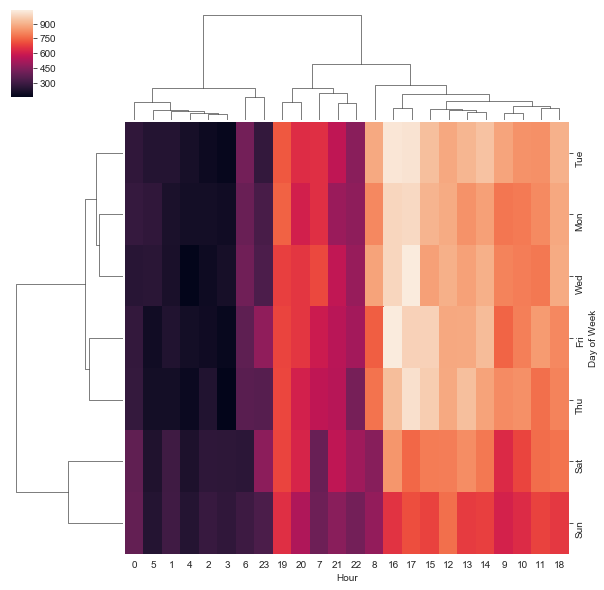

In [104]:
sns.clustermap(dayHour)

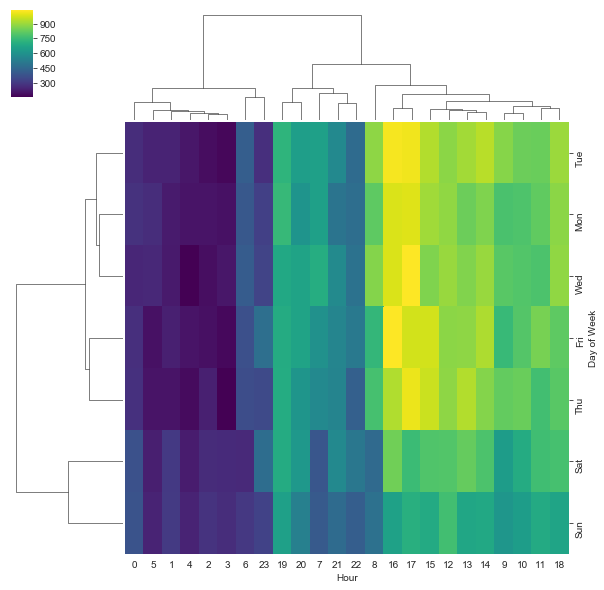

In [105]:
sns.clustermap(dayHour,cmap='viridis')

#### Agora vamos repetir estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. 

In [106]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


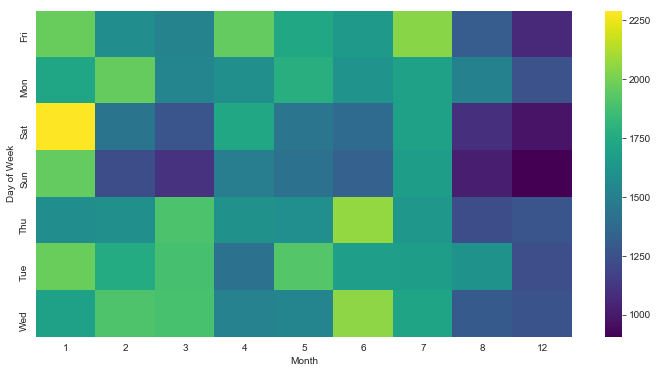

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

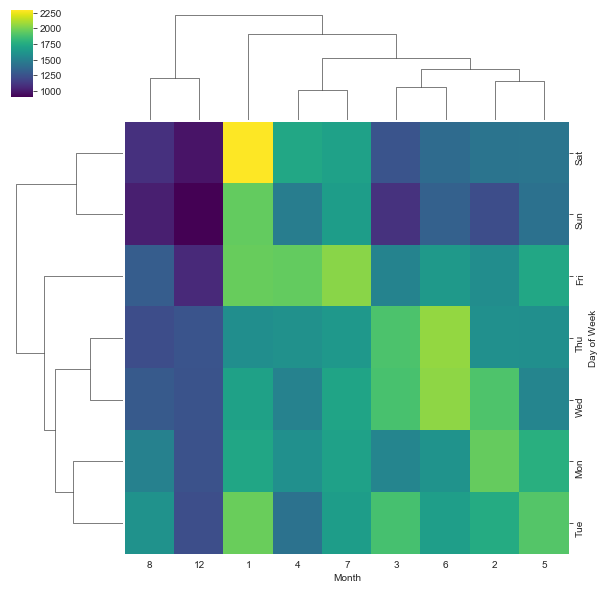

In [109]:
sns.clustermap(dayMonth,cmap='viridis')